# Pampa Energia

Pampa Energia S.A. is the largest independent energy company in Argentina. Even though the company is only 20 years old, it has over 2 billion USD in revenue and over 10,000 employees. 

While the company is based in Buenos Aires Argentina, it is publically traded on both the New York Stock Exchange (NYSE) and the Buenos Aires Stock Exchange, Bolsa de Comercio de Buenos Aires (BCBA). The tickers for both are PAM and PAMP respectively. Over the last 5 years, both of these stocks have seen massive increases in share price. The BCBA: PAMP has  increased over 8,500% and NYSE: PAM by over 500%.

There are definitely several factors to consider beyond just profitability when looking at the performance of this company's share price, because the quarterly revenue had stabilised at around 200 million USD before seeing a sharp increase to almost 1 billion from Q3 2016 to Q3 2020, before falling back down to a stable level of about 450 million USD over the last 4.

In this document, I will start by finding the Ogive of the daily returns to identify a  significant and consistent return, then following it up with a forecast by modelling the countries interest rates as a Ornstein-Uhlenbeck Process.

## 1. Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

## 2. Pampa Energía Stock Price Analysis

### 2.1 Ogive: Twelve Months

An Ogive is a cumulative frequency graph. In this case, I will be using the cumulative relative frequency to analyse the distribution of the daily returns over the last 12 months and the last 5 years.

[*********************100%***********************]  1 of 1 completed


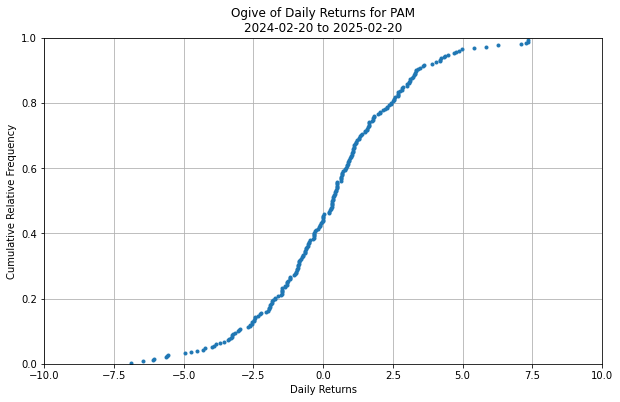

In [2]:
# 1 Year
ticker = "PAM"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.DateOffset(years=1)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)


df['returns'] = df['Adj Close'].pct_change() *100

# Using a direct empirical CDF approach 
returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Relative Frequency')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



### 2.2 Summary Statistics

In [3]:
returns = df['returns'].dropna()

returns

Date
2024-02-21    0.356628
2024-02-22    3.293057
2024-02-23    2.155969
2024-02-26   -2.447239
2024-02-27   -2.531651
                ...   
2025-02-12    1.164900
2025-02-13    3.083413
2025-02-14    0.310289
2025-02-18    0.358823
2025-02-19   -0.320555
Name: returns, Length: 250, dtype: float64

In [4]:

print("Summary Statistics for Daily Returns:\n")

print(returns.describe())

Summary Statistics for Daily Returns:

count    250.000000
mean       0.296181
std        2.636423
min       -6.870394
25%       -1.280121
50%        0.345037
75%        1.773756
max       10.382267
Name: returns, dtype: float64


### 2.3 Ogive: 5 Years

[*********************100%***********************]  1 of 1 completed


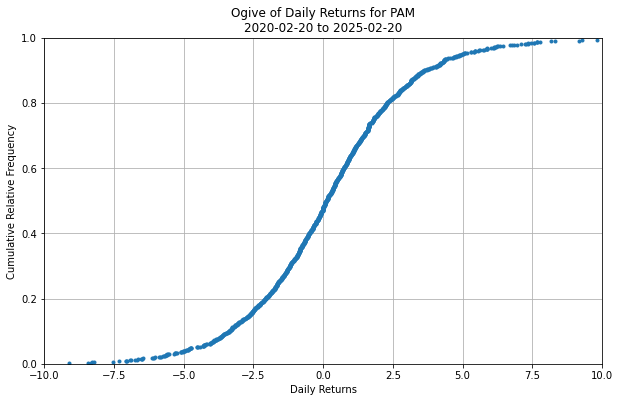

In [5]:
# 5 Year
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

df['returns'] = df['Adj Close'].pct_change() *100

returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Relative Frequency')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



### 2.4 Summary Statistics

In [6]:
returns = df['returns'].dropna()

returns


Date
2020-02-21    0.302801
2020-02-24   -2.716979
2020-02-25   -3.258340
2020-02-26   -2.325581
2020-02-27   -2.463056
                ...   
2025-02-12    1.164900
2025-02-13    3.083413
2025-02-14    0.310289
2025-02-18    0.358823
2025-02-19   -0.320555
Name: returns, Length: 1256, dtype: float64

In [7]:

print("Summary Statistics for Daily Returns:\n")

print(returns.describe())

Summary Statistics for Daily Returns:

count    1256.000000
mean        0.191148
std         3.074786
min       -17.572603
25%        -1.602098
50%         0.113674
75%         1.808714
max        22.172948
Name: returns, dtype: float64


## 3. Comparison to the S&P500

### 3.1 Ogive: Twelve Months

[*********************100%***********************]  1 of 1 completed


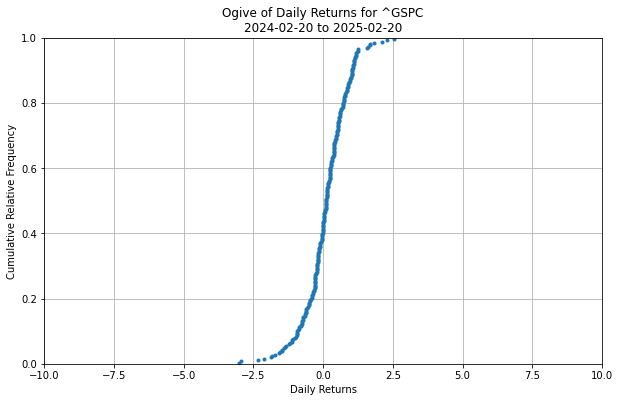

In [8]:
# 1 year
ticker = "^GSPC"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.DateOffset(years=1)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)


df['returns'] = df['Adj Close'].pct_change() *100


returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Relative Frequency')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



### 3.2 Summary Statistics

In [9]:
returns = df['returns'].dropna()

returns

Date
2024-02-21    0.126420
2024-02-22    2.112288
2024-02-23    0.034795
2024-02-26   -0.378675
2024-02-27    0.170635
                ...   
2025-02-12   -0.272387
2025-02-13    1.042629
2025-02-14   -0.007194
2025-02-18    0.244499
2025-02-19    0.237697
Name: returns, Length: 250, dtype: float64

In [10]:

print("Summary Statistics for Daily Returns:\n")

print(returns.describe())

Summary Statistics for Daily Returns:

count    250.000000
mean       0.087655
std        0.804623
min       -2.996880
25%       -0.288727
50%        0.113138
75%        0.559035
max        2.529593
Name: returns, dtype: float64


### 3.3 Ogive: 5 Year

[*********************100%***********************]  1 of 1 completed


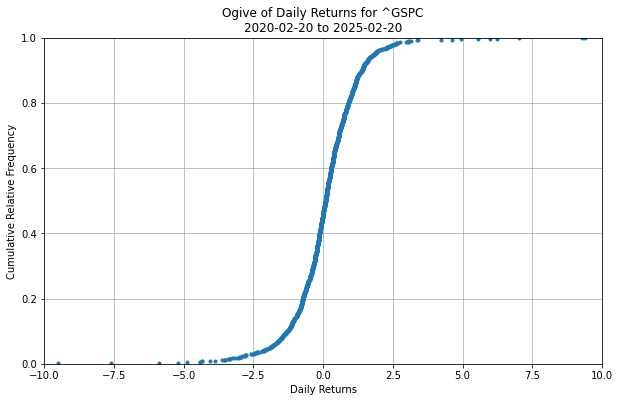

In [11]:
# 5 year
ticker = "^GSPC"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime("%Y-%m-%d")

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)


df['returns'] = df['Adj Close'].pct_change() *100
returns = df['returns'].dropna()

returns

# -- Method A: Using a direct empirical CDF approach --
returns_sorted = np.sort(df['returns'])
n = len(returns_sorted)
cdf = np.arange(1, n + 1) / n  # Fraction of data points <= each value

plt.figure(figsize=(10, 6))
plt.plot(returns_sorted, cdf, marker='.', linestyle='none')
plt.title(f'Ogive of Daily Returns for {ticker}\n{start_date} to {end_date}')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Relative Frequency')
plt.grid(True)

# Set fixed axis limits
plt.xlim(-10, 10)  
plt.ylim(0, 1)     # Cumulative probability always ranges from 0 to 1

# Show the plot
plt.show()

plt.show()



### 3.4 Summary Statistics

In [12]:

print("Summary Statistics for Daily Returns:\n")

print(returns.describe())

Summary Statistics for Daily Returns:

count    1256.000000
mean        0.056848
std         1.345633
min       -11.984055
25%        -0.530819
50%         0.089549
75%         0.728787
max         9.382774
Name: returns, dtype: float64


# Macroeconomic Conditions

## Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck process is a stochastic process used to model a system which fluctuates randomly due to noise, but pulls back to an average value due to a mean-reverting force.


The Ornstein-Uhlenbeck process is defined by the following stochastic differential equation:

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$$

where:
- $X_t$ is the stochastic process being modelled
-  $\theta$ is the **mean reversion rate**.
- $\mu$ is the **long-term mean**.
- $ \sigma$ is the **volatility**.
- $ W_t $ is a **Wiener process (Brownian motion)**.

## OU Intuition

If the $X_t$ is above the $\mu$, then the term $  \theta (\mu - X_t) dt $ is negative, which leads to a negative $dX_t$, meaning the process falls back down towards the mean. If the $X_t$ is bwlow the $\mu$, then the opposite is true. This term is known as the **deterministic drift term**

The **stochastic diffusion term** is $\sigma dW_t$. It is the random noise modelled by the Wiener process. This ensures that even if the $X_t$ reverts to $\mu$, it fluctuates and converges.


In the code I will be using the Euler-Maruyama method. The expression for this is approximated as:

$$
X_{t+\Delta t} = X_t + \theta (\mu - X_t) \Delta t + \sigma \sqrt{\Delta t} \, Z_t
$$

where:
- $ \Delta t$ is the discrete time step.
- $ Z_t \sim \mathcal{N}(0,1) $ standard normal random variable.


The explicit solution to the OU process is:

$$
X_t = X_0 e^{-\theta t} + \mu (1 - e^{-\theta t}) + \sigma \int_0^t e^{-\theta (t-s)} dW_s
$$

**Note**: To minimize large changes and produce more conservative estimates, I will use bounds and a smoothing parameter for the forecasts.

## 1. Interest Rates

### 1.1 Prepare the Dataset

In [13]:
# Load interest rates data
interest_rates = pd.read_csv("interest_rates.csv", index_col="Date")


# Generate alternating dates from Jan 2000 to Jan 2025
dates = pd.date_range(start="2000-01-01", end="2025-01-01", freq="6MS")  # '6MS' = Start of month, every 6 months

dates = df = pd.DataFrame({"Date": dates})
interest_rates.index = dates['Date']

interest_rates.head()

,Interest Rate
Date,
2000-01-01,7.07
2000-07-01,7.01
2001-01-01,13.34
2001-07-01,9.27
2002-01-01,80.84


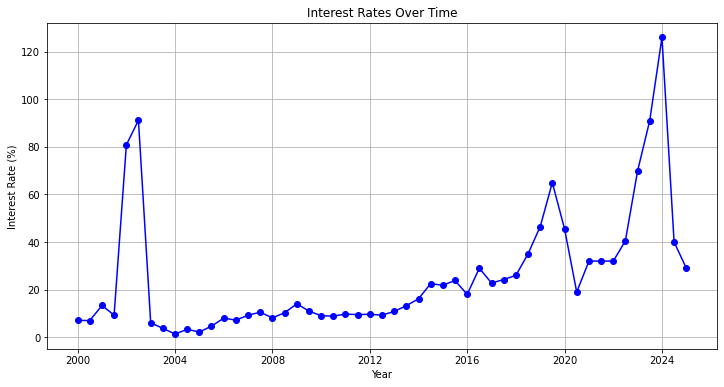

In [14]:

# Plot interest rates over time
plt.figure(figsize=(12, 6))
plt.plot(interest_rates.index, interest_rates["Interest Rate"], marker="o", linestyle="-", color="b")
plt.title("Interest Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.show()


### 1.2 Check for mean-reversion

A simple Augmented Dicky-Fuller test is used here to test whether the dataset is stationary. I initially though I might have to use a moving average, or a non-zero gradient. However, much to my suprise, the negative ADF statistic and the small p-value indicated that the data does indicate mean reverting properties.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(interest_rates["Interest Rate"])
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")

if adf_result[1] < 0.05:
    print("The data is stationary (mean-reverting).")
else:
    print("The data is non-stationary (shows a trend).")


ADF Statistic: -3.2674865015212555
P-Value: 0.016395876271354883
The data is stationary (mean-reverting).


### 1.3 Calculate Estimates

In [16]:

# Extract interest rate values
y = interest_rates["Interest Rate"].values
t = np.arange(len(y))  # Convert time index to numerical values

# Define the mean-reverting function: dy/dt = θ(μ - y) + σ * dW
def ou_function(t, theta, mu):
    return mu + (y[0] - mu) * np.exp(-theta * t)

# Fit the OU model to the data
params, _ = curve_fit(ou_function, t, y)
theta_est, mu_est = params

# Estimate volatility (σ)
diff_y = np.diff(y)
sigma_est = np.std(diff_y) * np.sqrt(2 * theta_est)

# Print estimated parameters
print(f"Estimated Mean-Reversion Speed (θ): {theta_est:.4f}")
print(f"Estimated Long-Term Mean (μ): {mu_est:.2f}%")
print(f"Estimated Volatility (σ): {sigma_est:.2f}")


Estimated Mean-Reversion Speed (θ): 0.8089
Estimated Long-Term Mean (μ): 26.19%
Estimated Volatility (σ): 28.32


/var/folders/cz/5jgxph3s48z_wzh0jf66hsgh0000gn/T/ipykernel_12331/253854124.py:7: RuntimeWarning: overflow encountered in exp
  return mu + (y[0] - mu) * np.exp(-theta * t)


### 1.4 Forecast

In [17]:
# ---- Step 2: Simulate Future Interest Rates Using the OU Process ----
num_forecast_steps = 10  # Forecast for the next 10 periods
dt = 1  # Time step
ou_forecast = [y[-1]]  # Start from last observed interest rate

lower_bound, upper_bound = 15, 40  # Bounds for interest rates
smoothing_factor = 0.5  # Reduce randomness effect

for _ in range(num_forecast_steps):
    dX = theta_est * (mu_est - ou_forecast[-1]) * dt + (sigma_est * np.random.normal() * smoothing_factor)
    new_rate = ou_forecast[-1] + dX
    
    # Apply bounds
    new_rate = max(lower_bound, min(upper_bound, new_rate))
    
    # Apply a simple smoothing effect to reduce abrupt changes
    new_rate = (ou_forecast[-1] + new_rate) / 2  
    
    ou_forecast.append(new_rate)
    
ou_forecast

[29.0,
 25.87326334806114,
 20.436631674030572,
 19.610593811571064,
 19.04195543484169,
 17.020977717420845,
 27.546271769278533,
 28.719084780101596,
 30.636069322499182,
 22.81803466124959,
 22.330937018702137]

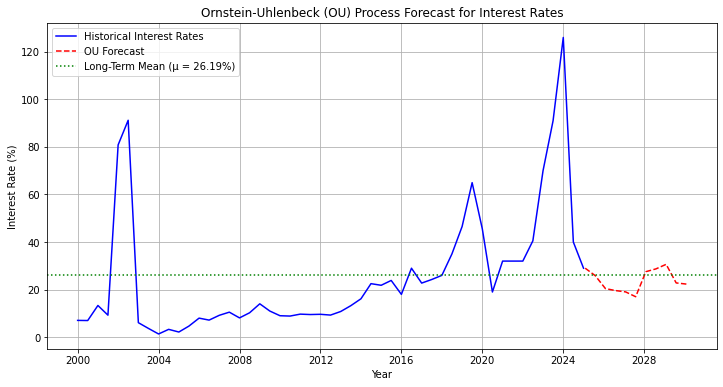

In [18]:

# ---- Step 3: Plot the Historical Data & OU Forecast ----
plt.figure(figsize=(12, 6))

# Plot historical interest rates
plt.plot(interest_rates.index, y, label="Historical Interest Rates", color="blue")

# Create time index for forecast
future_dates = pd.date_range(interest_rates.index[-1], periods=num_forecast_steps + 1, freq="6ME")

# Plot forecast
plt.plot(future_dates, ou_forecast, label="OU Forecast", linestyle="dashed", color="red")

# Add long-term mean reference line
plt.axhline(mu_est, color="green", linestyle="dotted", label=f"Long-Term Mean (μ = {mu_est:.2f}%)")

plt.title("Ornstein-Uhlenbeck (OU) Process Forecast for Interest Rates")
plt.xlabel("Year")
plt.ylabel("Interest Rate (%)")
plt.legend()
plt.grid(True)
plt.show()
